<a href="https://colab.research.google.com/github/sergekamanzi/Fraud-Detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('/content/fraud detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [29]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,3271,170136.0,160296.36,10143,0.0,0.0,0.0,0.0
1,1,3,1864.28,9757,21249.0,19384.72,10589,0.0,0.0,0.0,0.0
2,1,4,181.00,4372,181.0,0.00,2452,0.0,0.0,1.0,0.0
3,1,1,181.00,25969,181.0,0.00,2180,21182.0,0.0,1.0,0.0
4,1,3,11668.14,15331,41554.0,29885.86,4769,0.0,0.0,0.0,0.0


In [30]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()


# Encode the 'BMIcase' and 'Gender' columns
data['type'] = label_encoder.fit_transform(data['type'])
data['nameOrig'] = label_encoder.fit_transform(data['nameOrig'])
data['nameDest'] = label_encoder.fit_transform(data['nameDest'])


In [31]:
%%capture
data.head()

In [32]:
# Handle missing values (impute with median)
data.fillna(data.median(), inplace=True)

In [33]:
%%capture
# Checking for NAN values
data.isna().sum()

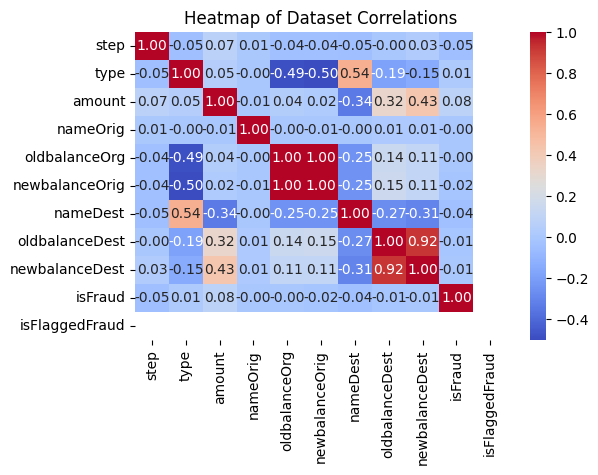

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap of Dataset Correlations')
plt.show()

In [39]:
# Split into features (X) and target (Y)
X = data.drop(columns=['nameOrig','nameDest','isFlaggedFraud'])
Y = data['isFraud']